In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("../data/raw/raport.xlsx")

In [3]:
df_2 = pd.read_excel("../data/raw/Zanonimizowane_całość urazy kręgosłupa 2014-2020 (1).xlsx")

In [23]:
len(df_2)

1048575

In [4]:
df.head()

,I.I.,Mężczyzna,low-energy trauma,high-energy trauma,brak wywiadu urazowego,RTG,Th,LS,Data badania,TK,...,C,SD,pre-DISH ze złamaniem,pre-DISH poza złamaniem,DISH ze złamaniem,DISH poza złamaniem,ZZSK,inne,charakteryzacja,Uwagi
0,MM M 62,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2020-05-06,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA K 46,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaT,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['I.I.', 'Mężczyzna', 'low-energy trauma', 'high-energy trauma ',
       'brak wywiadu urazowego', 'RTG', 'Th', 'LS', 'Data badania', 'TK',
       'TK multitrauma', 'Th.1', 'LS.1', 'klp C-', 'klp C+', 'jb C-', 'jb C+',
       'SOR', 'Data badania.1', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1',
       'B2', 'B3', 'C', 'SD', 'pre-DISH ze złamaniem',
       'pre-DISH poza złamaniem', 'DISH ze złamaniem', 'DISH poza złamaniem',
       'ZZSK', 'inne', 'charakteryzacja ', 'Uwagi'],
      dtype='object')

In [6]:
columns_of_interest = ['I.I.', 'Poziom', 'A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C', 'Mężczyzna']
df_trimmed = df[columns_of_interest].copy()
df_v2_trimmed = df_2[columns_of_interest].copy()
records = []
current_traumas = []
current_gender = None
current_ii = None

df_trimmed = pd.concat([df_trimmed, df_v2_trimmed], ignore_index=True, axis=0)


In [7]:
df_trimmed.head()

,I.I.,Poziom,A0,A1,A2,A3,A4,B1,B2,B3,C,Mężczyzna
0,MM M 62,L1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1,NaN,L2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,L4,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,L5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SA K 46,Th3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0


In [8]:
for _, row in df_trimmed.iterrows():
    if pd.notna(row['I.I.']):
        if current_traumas:
            records.append({
                "I.I": f"{current_ii}",
                "is_man": current_gender,
                "traumas": current_traumas
            })
        current_gender = bool(row['Mężczyzna'])
        current_traumas = []
        current_ii = row['I.I.']

    if pd.notna(row['Poziom']):
        level = row['Poziom']
        for trauma_type in ['A0', 'A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'C']:
            if pd.notna(row[trauma_type]):
                current_traumas.append((level, trauma_type))

if current_traumas:
    records.append({
        "I.I": f"I.I. {current_ii}",
        "is_man": current_gender,
        "traumas": current_traumas
    })


In [9]:
records_df = pd.DataFrame(records)
records_df.head(10)

,I.I,is_man,traumas
0,MM M 62,True,"[(L1, A4), (L2, A1), (L4, A1), (L5, A1)]"
1,SA K 46,False,"[(Th3, B1)]"
2,PG M 75,True,"[(Th10, A1), (Th11, A1), (Th12, A3), (Th11/Th1..."
3,ZR M 79,True,"[(Th11/Th12, B3), (L1, A0), (L2, A0), (L3, A0)..."
4,"MM K 1, 2 35",False,"[(Th6, A1)]"
5,RM M 40,True,"[(Th8/Th9 , B3)]"
6,CS K 97,False,"[(Th6, A1), (Th7/Th8, B2), (Th8, A4), (Th10, A..."
7,JJ K 25,False,"[(Th11, A3), (Th10/Th11, B2)]"
8,NJ M 57,True,"[(Th12/L1, C)]"
9,SW M 47,True,"[(Th10, A1), (Th11, A1), (L1, A1), (Th10/Th11,..."


In [10]:
records_df.tail(10)

,I.I,is_man,traumas
377,L.A.,False,"[(L1/L2, B2), (L2, A4), (L3, A0), (L5, A1)]"
378,F.J.,True,"[(Th12/L1, B2), (L1, A4)]"
379,G.A.,True,"[(Th2, A1), (Th3, A3), (Th4, A4), (Th5, A1), (..."
380,J.J.,False,"[(Th11, A3), (Th10/Th11, B2)]"
381,P.Ł.,True,"[(Th1, A0), (Th4, A0), (Th4-Th7, B1), (Th6/Th7..."
382,D.M.,True,"[(L1, A0), (L2, A0), (L4/L5, C), (L5, A4)]"
383,S.W.,True,"[(Th10, A1), (Th11, A1), (L1, A1), (Th10/Th11,..."
384,N.J.,True,"[(Th12/L1, C)]"
385,N.W.,True,"[(Th2/Th3, B2), (Th3, A1), (L5, A0)]"
386,I.I. D.J.,True,"[(L3, A1)]"


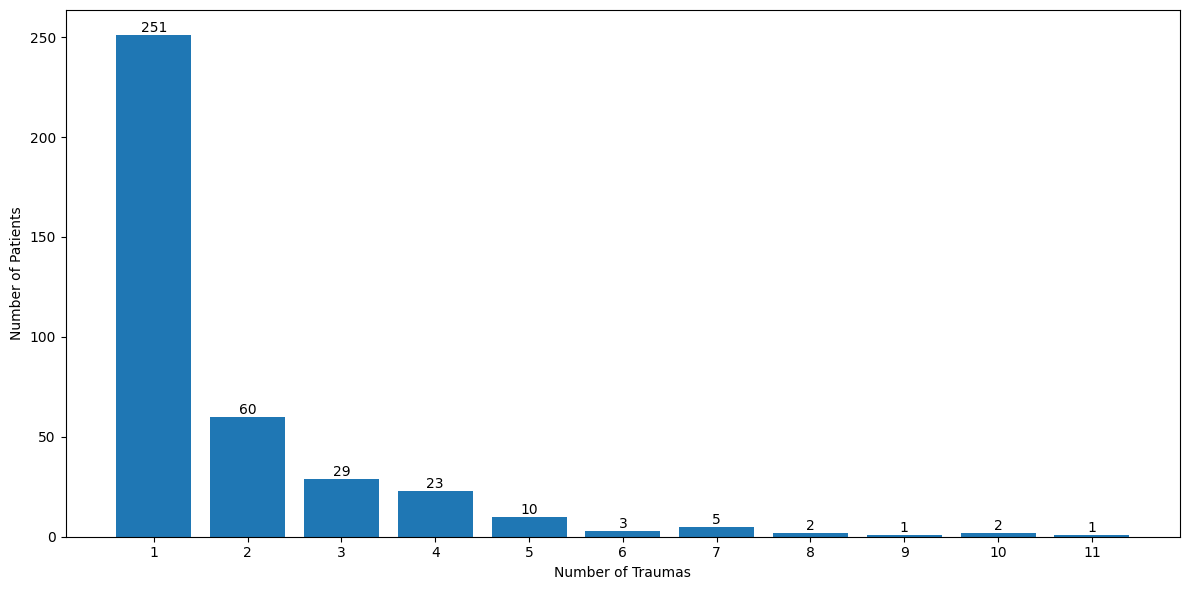

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

# Funkcja do obliczania liczby urazów z uwzględnieniem podwójnego zliczania dla "-" i "/"
def count_traumas_with_split(traumas):
    count = 0
    for trauma in traumas:
        location = trauma[0]  # Pierwszy element tupli to lokalizacja
        if "-" in location or "/" in location:
            count += 2  # Zliczaj dwa razy, jeśli lokalizacja zawiera "-" lub "/"
        else:
            count += 1  # Zliczaj raz w pozostałych przypadkach
    return count

# Dodanie kolumny z liczbą urazów do DataFrame
records_df["trauma_count"] = records_df["traumas"].apply(count_traumas_with_split)

# Liczenie, ilu pacjentów ma określoną liczbę urazów
trauma_distribution = records_df["trauma_count"].value_counts().sort_index()

# Tworzenie histogramu
plt.figure(figsize=(12, 6))
bars = plt.bar(trauma_distribution.index, trauma_distribution.values)
plt.xlabel("Number of Traumas")
plt.ylabel("Number of Patients")
plt.xticks(trauma_distribution.index)
plt.tight_layout()

# Dodawanie wartości nad słupkami
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()

In [11]:
len(records_df)

387

In [12]:
records_df.dtypes

I.I        object
is_man       bool
traumas    object
dtype: object

In [13]:
all_pairs = records_df.explode('traumas')['traumas']
all_pairs

0           (L1, A4)
0           (L2, A1)
0           (L4, A1)
0           (L5, A1)
1          (Th3, B1)
           ...      
384     (Th12/L1, C)
385    (Th2/Th3, B2)
385        (Th3, A1)
385         (L5, A0)
386         (L3, A1)
Name: traumas, Length: 658, dtype: object

In [18]:
import re
import matplotlib.pyplot as plt
from natsort import natsorted

# Dane wejściowe
# all_pairs = [...]  # Zakładam, że masz listę par (first, second)

# Liczenie wystąpień dla pierwszego elementu (kręgi)
first_elements = Counter()
for first, _ in all_pairs:
    segments = re.split(r"[/\-]", first)
    for segment in segments:
        first_elements[segment.strip()] += 1

# Liczenie wystąpień dla drugiego elementu (typy urazów)
second_elements = Counter([x[1] for x in all_pairs])

# Kolejność kręgów: od Th1 do Th12, L1 do L5
vertebra_order = [f"Th{i}" for i in range(1, 13)] + [f"L{i}" for i in range(1, 6)]

# Sortowanie first_elements według vertebra_order
sorted_first_keys = [key for key in vertebra_order if key in first_elements]
sorted_first_values = [first_elements[key] for key in sorted_first_keys]



In [19]:
print("First elements:")
for k, v in first_elements.most_common(20):
    print(f"{k}: {v}")

First elements:
L1: 161
Th12: 105
L2: 85
L3: 65
Th11: 56
L4: 39
Th10: 26
Th6: 23
Th4: 23
L5: 21
Th3: 21
Th7: 20
Th8: 19
Th5: 16
Th9: 11
Th2: 11
Th1: 7


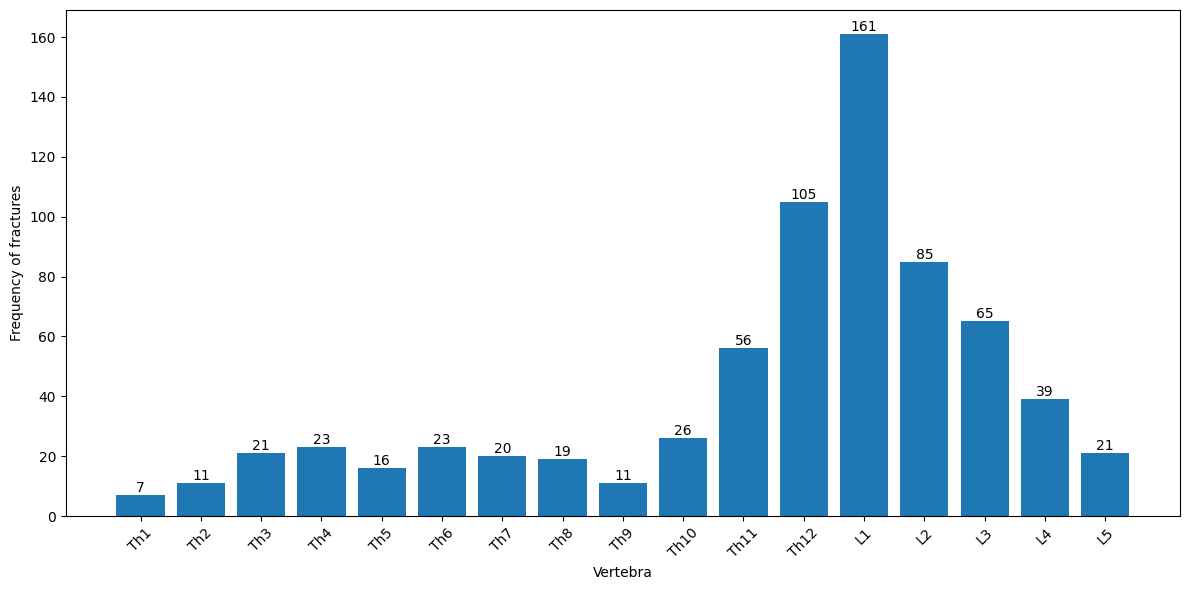

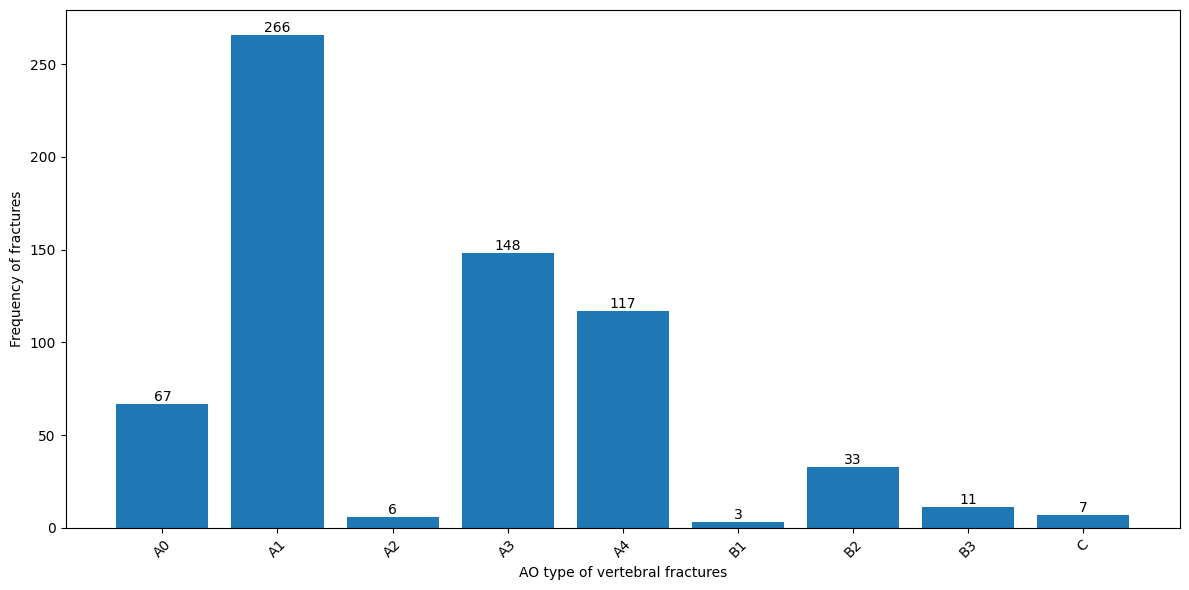

In [21]:
# Histogram 1: Vertebra vs Frequency of fractures
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_first_keys, sorted_first_values)
plt.xlabel("Vertebra")
plt.ylabel("Frequency of fractures")
plt.xticks(rotation=45)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

# Histogram 2: AO type of vertebral fractures vs Frequency of fractures
sorted_second_keys = natsorted(second_elements.keys())  # Naturalne sortowanie typów urazów
sorted_second_values = [second_elements[key] for key in sorted_second_keys]

plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_second_keys, sorted_second_values)
plt.xlabel("AO type of vertebral fractures")
plt.ylabel("Frequency of fractures")
plt.xticks(rotation=45)
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')
plt.show()

In [21]:
# Oryginalny słownik
vertebrae_dict = {
    "18": "vertebrae_L5",
    "19": "vertebrae_L4",
    "20": "vertebrae_L3",
    "21": "vertebrae_L2",
    "22": "vertebrae_L1",
    "23": "vertebrae_T12",
    "24": "vertebrae_T11",
    "25": "vertebrae_T10",
    "26": "vertebrae_T9",
    "27": "vertebrae_T8",
    "28": "vertebrae_T7",
    "29": "vertebrae_T6",
    "30": "vertebrae_T5",
    "31": "vertebrae_T4",
    "32": "vertebrae_T3",
    "33": "vertebrae_T2",
    "34": "vertebrae_T1",
    "35": "vertebrae_C7",
    "36": "vertebrae_C6",
    "37": "vertebrae_C5",
    "38": "vertebrae_C4",
    "39": "vertebrae_C3",
    "40": "vertebrae_C2",
    "41": "vertebrae_C1",
}

# Odwrócenie słownika i usunięcie prefiksu "vertebrae_"
reversed_dict = {value.replace("vertebrae_", ""): int(key) for key, value in vertebrae_dict.items()}

# Przykład użycia
print(reversed_dict)  # Wynik: 19

{'L5': 18, 'L4': 19, 'L3': 20, 'L2': 21, 'L1': 22, 'T12': 23, 'T11': 24, 'T10': 25, 'T9': 26, 'T8': 27, 'T7': 28, 'T6': 29, 'T5': 30, 'T4': 31, 'T3': 32, 'T2': 33, 'T1': 34, 'C7': 35, 'C6': 36, 'C5': 37, 'C4': 38, 'C3': 39, 'C2': 40, 'C1': 41}


In [22]:
def extract_dir_names(raw: str) -> list[str]:
    parts = raw.split()
    if ',' in raw:
        prefix = ' '.join(parts[:2])
        numbers = parts[2].split(',')
        if len(parts) == 4:
            numbers += [parts[3]]
        else:
            numbers[-1] = numbers[-1].strip(',')
            numbers = [n.strip() for n in numbers]
            numbers[-1] += ' ' + parts[-1]
        return [f"{prefix} {n.strip()} {parts[-1]}" for n in numbers[:-1]]
    return [raw]

In [23]:
extract_dir_names("MM K 1, 2 35")

['MM K 1 35']

In [28]:
import seaborn as sns

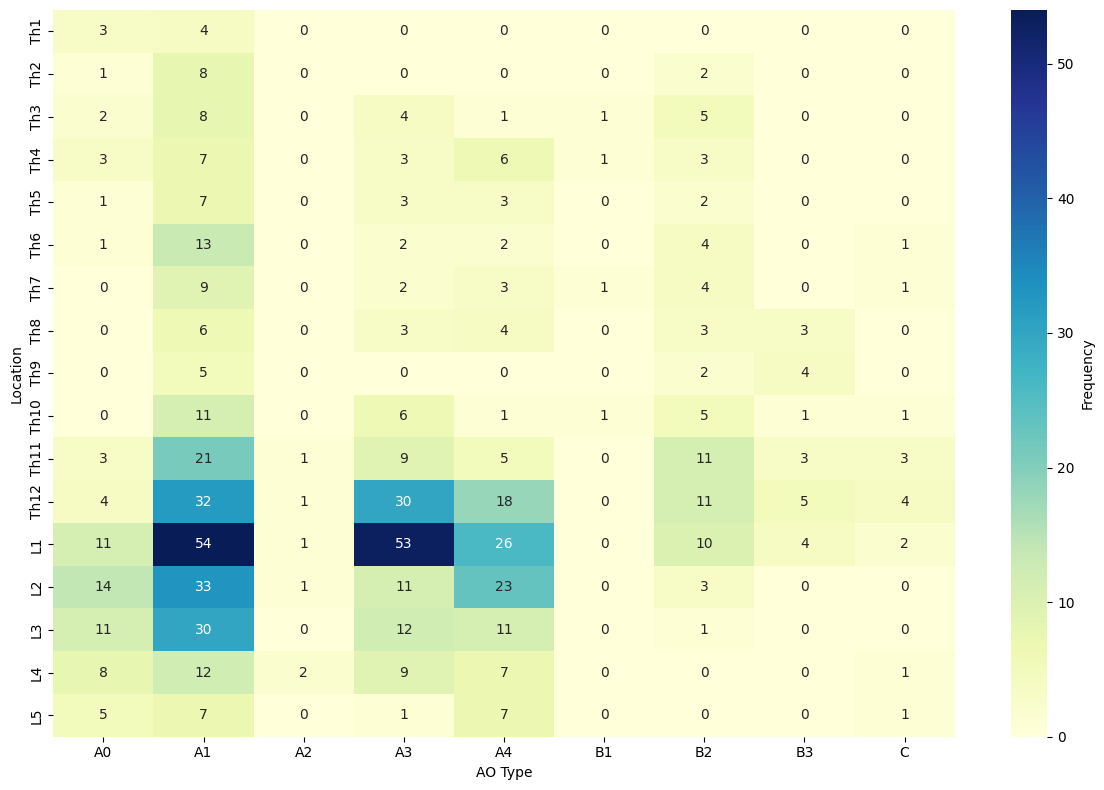

In [35]:
expanded_data = []
for first, second in all_pairs:
    segments = re.split(r"[/\-]", first)  # Rozdzielanie lokalizacji
    for segment in segments:
        expanded_data.append({"Location": segment.strip(), "AO_Type": second})

# Tworzenie DataFrame
df = pd.DataFrame(expanded_data)

# Grupowanie danych i tworzenie tabeli przestawnej
pivot_table = df.pivot_table(index="Location", columns="AO_Type", aggfunc="size", fill_value=0)

# Sortowanie wierszy według vertebra_order
pivot_table = pivot_table.reindex(vertebra_order)

# Tworzenie heatmapy
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Frequency"})
plt.xlabel("AO Type")
plt.ylabel("Location")
plt.tight_layout()
plt.show()